<a href="https://colab.research.google.com/github/HenriquedoVal/BTC-vs-Meme/blob/main/BTC_vs_Meme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre:
Breve análise de algumas diferenças entre criptomoedas fundamentadas e memecoins (cujo fundamento é a _hype_). Aqui foram usados os dados do Bitcoin e da Dogecoin.
Datasets retirados do Kaggle. Em desenvolvimento.

# Setup

In [21]:
!pip install pandera #Sintaxe para acessar o terminal no Colab

In [22]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

In [23]:
pd.options.display.float_format = '{:,.2f}'.format #Para formatar a notação científica

# Bitcoin

## Extração e validação

In [24]:
dfbtc = pd.read_csv('/content/drive/MyDrive/Datasets/BTC & Meme/Bitcoin.csv', parse_dates=['Date'])
dfbtc.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap
2256,2015-04-24,235.97,236.30,229.93,231.27,"21,448,700.00","3,258,311,725.20"
1043,2018-08-19,"6,422.57","6,537.98","6,361.55","6,506.07","3,311,170,000.00","112,031,838,393.00"
727,2019-01-07,"10,796.93","11,206.44","10,089.31","10,583.13","29,378,589,324.45","188,297,637,573.83"
607,2019-10-29,"9,248.44","9,516.18","9,232.65","9,427.69","28,426,779,937.41","169,883,866,262.33"
2285,2015-03-26,246.28,254.35,244.90,248.53,"25,730,000.00","3,475,701,380.10"


In [25]:
dfbtc.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [26]:
dfbtc.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [27]:
dfbtc['Drawdown'] = dfbtc['High'] - dfbtc['Low'] #Drawdown é uma forma de medir a volatilidade, neste caso, diária
dfbtc.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
1521,2017-04-28,"1,317.74","1,331.28","1,292.37","1,316.48","527,488,992.00","21,457,669,552.00",38.91
21,2021-06-06,"35,538.61","36,436.42","35,304.58","35,862.38","28,913,440,584.92","671,652,557,855.14","1,131.84"
912,2018-12-28,"3,653.13","3,956.14","3,642.63","3,923.92","5,631,554,348.36","68,471,837,968.72",313.50
2065,2015-01-11,315.01,327.47,311.88,325.43,"37,001,100.00","4,813,287,205.50",15.59
2741,2013-12-25,666.31,682.70,649.48,682.21,0.00,"8,305,173,374.25",33.22


In [28]:
#Validação dos dados - Perfumaria, uma vez que a fonte de dados é bem consistente
schema = pa.DataFrameSchema(
    columns = {
        'Date': pa.Column(pa.DateTime),
        'Open': pa.Column(pa.Float),
        'High': pa.Column(pa.Float),
        'Low': pa.Column(pa.Float),
        'Close': pa.Column(pa.Float),
        'Volume': pa.Column(pa.Float),
        'Market Cap': pa.Column(pa.Float),
        'Drawdown': pa.Column(pa.Float)
})

In [29]:
schema.validate(dfbtc)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
0,2021-06-27,"32,287.52","34,656.13","32,071.76","34,649.64","35,511,640,893.97","649,461,677,014.12","2,584.37"
1,2021-06-26,"31,594.66","32,637.59","30,184.50","32,186.28","38,585,385,521.38","603,276,028,308.72","2,453.09"
2,2021-06-25,"34,659.10","35,487.25","31,350.88","31,637.78","40,230,904,226.00","592,978,211,189.03","4,136.36"
3,2021-06-24,"33,682.80","35,228.85","32,385.21","34,662.44","33,123,368,116.18","649,643,997,441.37","2,843.64"
4,2021-06-23,"32,515.71","34,753.41","31,772.63","33,723.03","46,317,108,924.69","632,011,278,436.38","2,980.78"
...,...,...,...,...,...,...,...,...
2978,2013-02-05,116.38,125.60,92.28,105.21,0.00,"1,168,517,495.25",33.32
2979,2013-01-05,139.00,139.89,107.72,116.99,0.00,"1,298,954,593.75",32.17
2980,2013-04-30,144.00,146.93,134.05,139.00,0.00,"1,542,813,125.00",12.88
2981,2013-04-29,134.44,147.49,134.00,144.54,0.00,"1,603,768,864.50",13.49


# Dogecoin

## Extração e validação

In [30]:
dfdoge = pd.read_csv('/content/drive/MyDrive/Datasets/BTC & Meme/Dogecoin.csv', parse_dates=['Date'])
dfdoge

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-06-27,0.25,0.27,0.24,0.26,"2,167,521,670.48","34,431,598,885.98"
1,2021-06-26,0.24,0.26,0.23,0.24,"2,649,457,301.97","31,867,533,718.63"
2,2021-06-25,0.26,0.29,0.23,0.24,"5,542,163,262.31","31,131,171,916.24"
3,2021-06-24,0.23,0.27,0.22,0.26,"3,844,648,059.04","34,205,589,762.94"
4,2021-06-23,0.19,0.25,0.18,0.23,"5,098,674,891.27","30,217,348,680.34"
...,...,...,...,...,...,...,...
2747,2013-12-19,0.00,0.00,0.00,0.00,0.00,"11,150,339.22"
2748,2013-12-18,0.00,0.00,0.00,0.00,0.00,"3,188,943.21"
2749,2013-12-17,0.00,0.00,0.00,0.00,0.00,"2,169,687.98"
2750,2013-12-16,0.00,0.00,0.00,0.00,0.00,"1,509,085.16"


In [31]:
dfdoge.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap           float64
dtype: object

In [32]:
dfdoge.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [33]:
dfdoge['Drawdown'] = dfdoge['High'] - dfdoge['Low']
dfdoge.sample(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
2022,2015-12-14,0.00,0.00,0.00,0.00,"147,375.00","14,829,491.70",0.00
630,2019-06-10,0.00,0.00,0.00,0.00,"40,093,923.41","285,110,218.07",0.00
2654,2014-03-22,0.00,0.00,0.00,0.00,"830,262.00","43,119,659.35",0.00
822,2019-03-28,0.00,0.00,0.00,0.00,"20,558,761.42","246,454,838.41",0.00
1672,2016-11-28,0.00,0.00,0.00,0.00,"77,058.20","23,318,708.09",0.00


In [34]:
schema.validate(dfdoge) #Schema já está definido

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
0,2021-06-27,0.25,0.27,0.24,0.26,"2,167,521,670.48","34,431,598,885.98",0.03
1,2021-06-26,0.24,0.26,0.23,0.24,"2,649,457,301.97","31,867,533,718.63",0.02
2,2021-06-25,0.26,0.29,0.23,0.24,"5,542,163,262.31","31,131,171,916.24",0.06
3,2021-06-24,0.23,0.27,0.22,0.26,"3,844,648,059.04","34,205,589,762.94",0.05
4,2021-06-23,0.19,0.25,0.18,0.23,"5,098,674,891.27","30,217,348,680.34",0.07
...,...,...,...,...,...,...,...,...
2747,2013-12-19,0.00,0.00,0.00,0.00,0.00,"11,150,339.22",0.00
2748,2013-12-18,0.00,0.00,0.00,0.00,0.00,"3,188,943.21",0.00
2749,2013-12-17,0.00,0.00,0.00,0.00,0.00,"2,169,687.98",0.00
2750,2013-12-16,0.00,0.00,0.00,0.00,0.00,"1,509,085.16",0.00


# Análise exploratória

In [35]:
dfbtc.loc[dfbtc['Market Cap'] == dfbtc['Market Cap'].max()]

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
75,2021-04-13,"59,890.02","63,742.28","59,869.96","63,503.46","69,983,454,361.84","1,186,364,044,140.27","3,872.33"


In [36]:
dfdoge.loc[dfdoge['Market Cap'] == dfdoge['Market Cap'].max()]

,Date,Open,High,Low,Close,Volume,Market Cap,Drawdown
51,2021-07-05,0.58,0.73,0.52,0.68,"28,615,083,656.92","88,680,824,303.07",0.21


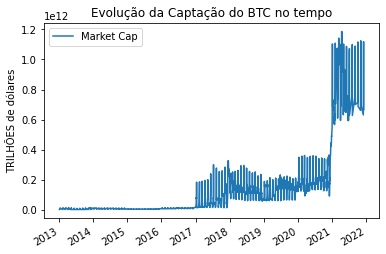

In [45]:
dfbtc.groupby('Date')['Market Cap'].sum().plot()
plt.title('Evolução da Captação do BTC no tempo')
plt.ylabel('TRILHÕES de dólares')
plt.xlabel('')
plt.legend();

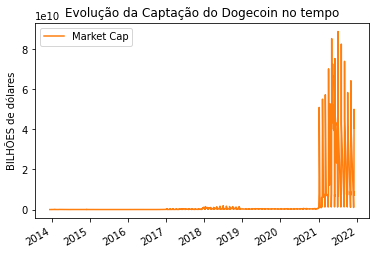

In [48]:
dfdoge.groupby('Date')['Market Cap'].sum().plot(color='tab:orange')
plt.title('Evolução da Captação do Dogecoin no tempo')
plt.ylabel('BILHÕES de dólares')
plt.xlabel('')
plt.legend();

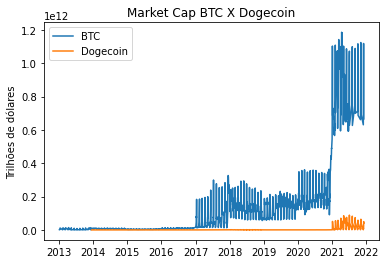

In [39]:
btc = dfbtc.groupby('Date')['Market Cap'].sum()
doge = dfdoge.groupby('Date')['Market Cap'].sum()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(btc, color='tab:blue', label='BTC')
ax.plot(doge, color='tab:orange', label='Dogecoin')

plt.title('Market Cap BTC X Dogecoin')
plt.ylabel('Trilhões de dólares')
plt.legend();